In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import axes

In [6]:
file_path = 'train.csv'
data = pd.read_csv(file_path)

기술 통계량:
      count          mean           std          min          25%  \
X1   6164.0     62.883079     15.640274    18.118990    52.985990   
X5   5326.0     11.697146      3.415581     0.000000    10.000000   
X7   6164.0     12.893900     25.664085     0.000000     0.000000   
X8   6053.0  58721.659241  97417.929824  1169.000000  9923.000000   
X9   6109.0     23.287416     13.552200     1.000000    12.000000   
X11  6164.0     38.579007     20.178164     0.000000    24.000000   
X12  6164.0      4.550130      9.231913     1.000000     1.000000   
X16  5125.0      0.600248      0.304069     0.000000     0.400000   
X18  6163.0     84.020688     27.865961     0.000000    63.000000   
X19  6015.0     12.530799      9.300530     0.000000     7.000000   
X20  6163.0     97.348580     31.972126     0.000000    72.000000   
X21  6163.0     23.347720      9.660043     0.000000    18.000000   
X22  6163.0     37.094778      1.258990    31.699220    36.093750   
X23  4636.0    238.632371 

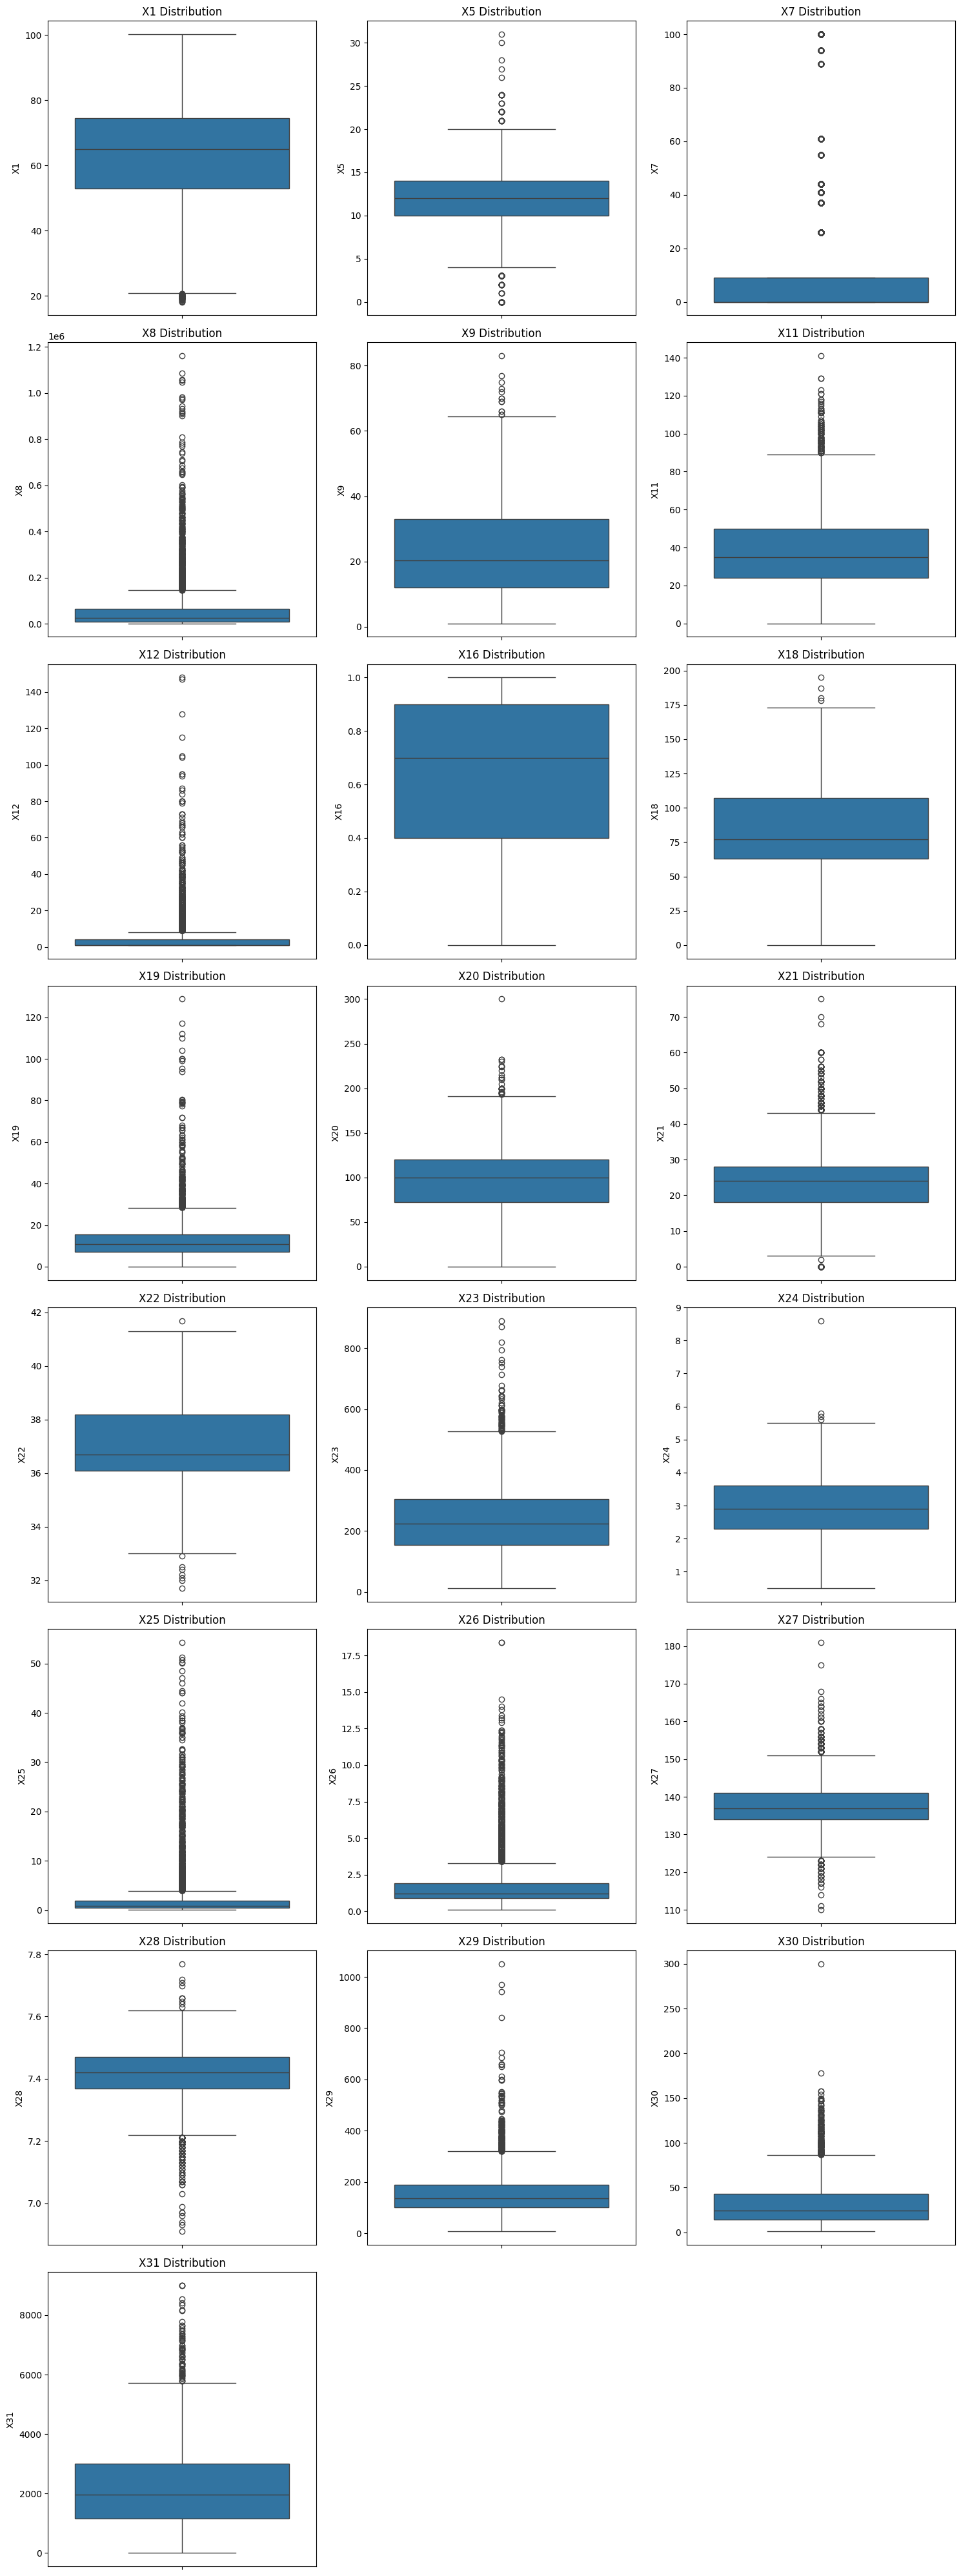

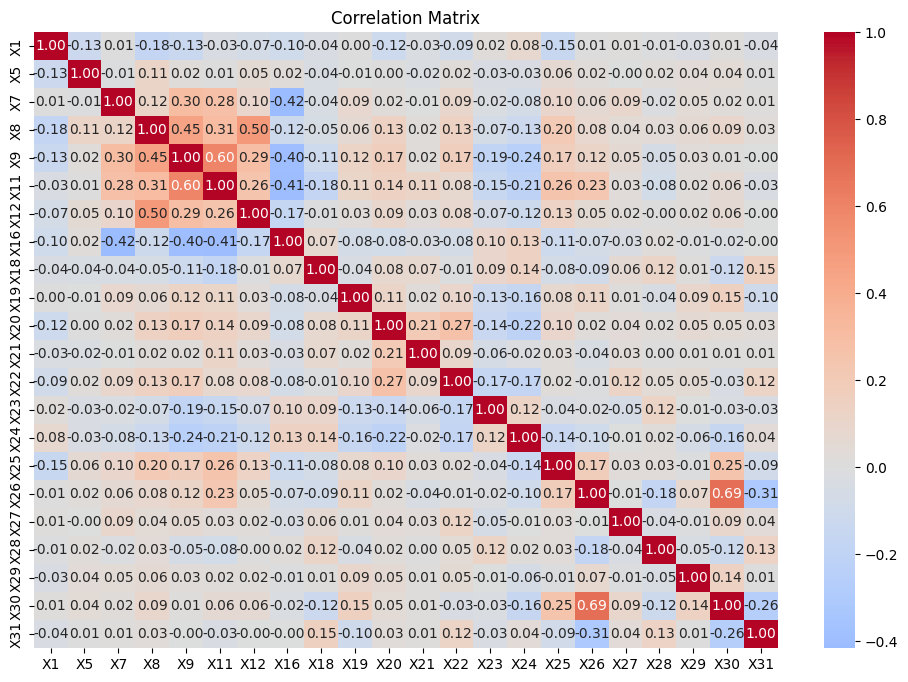

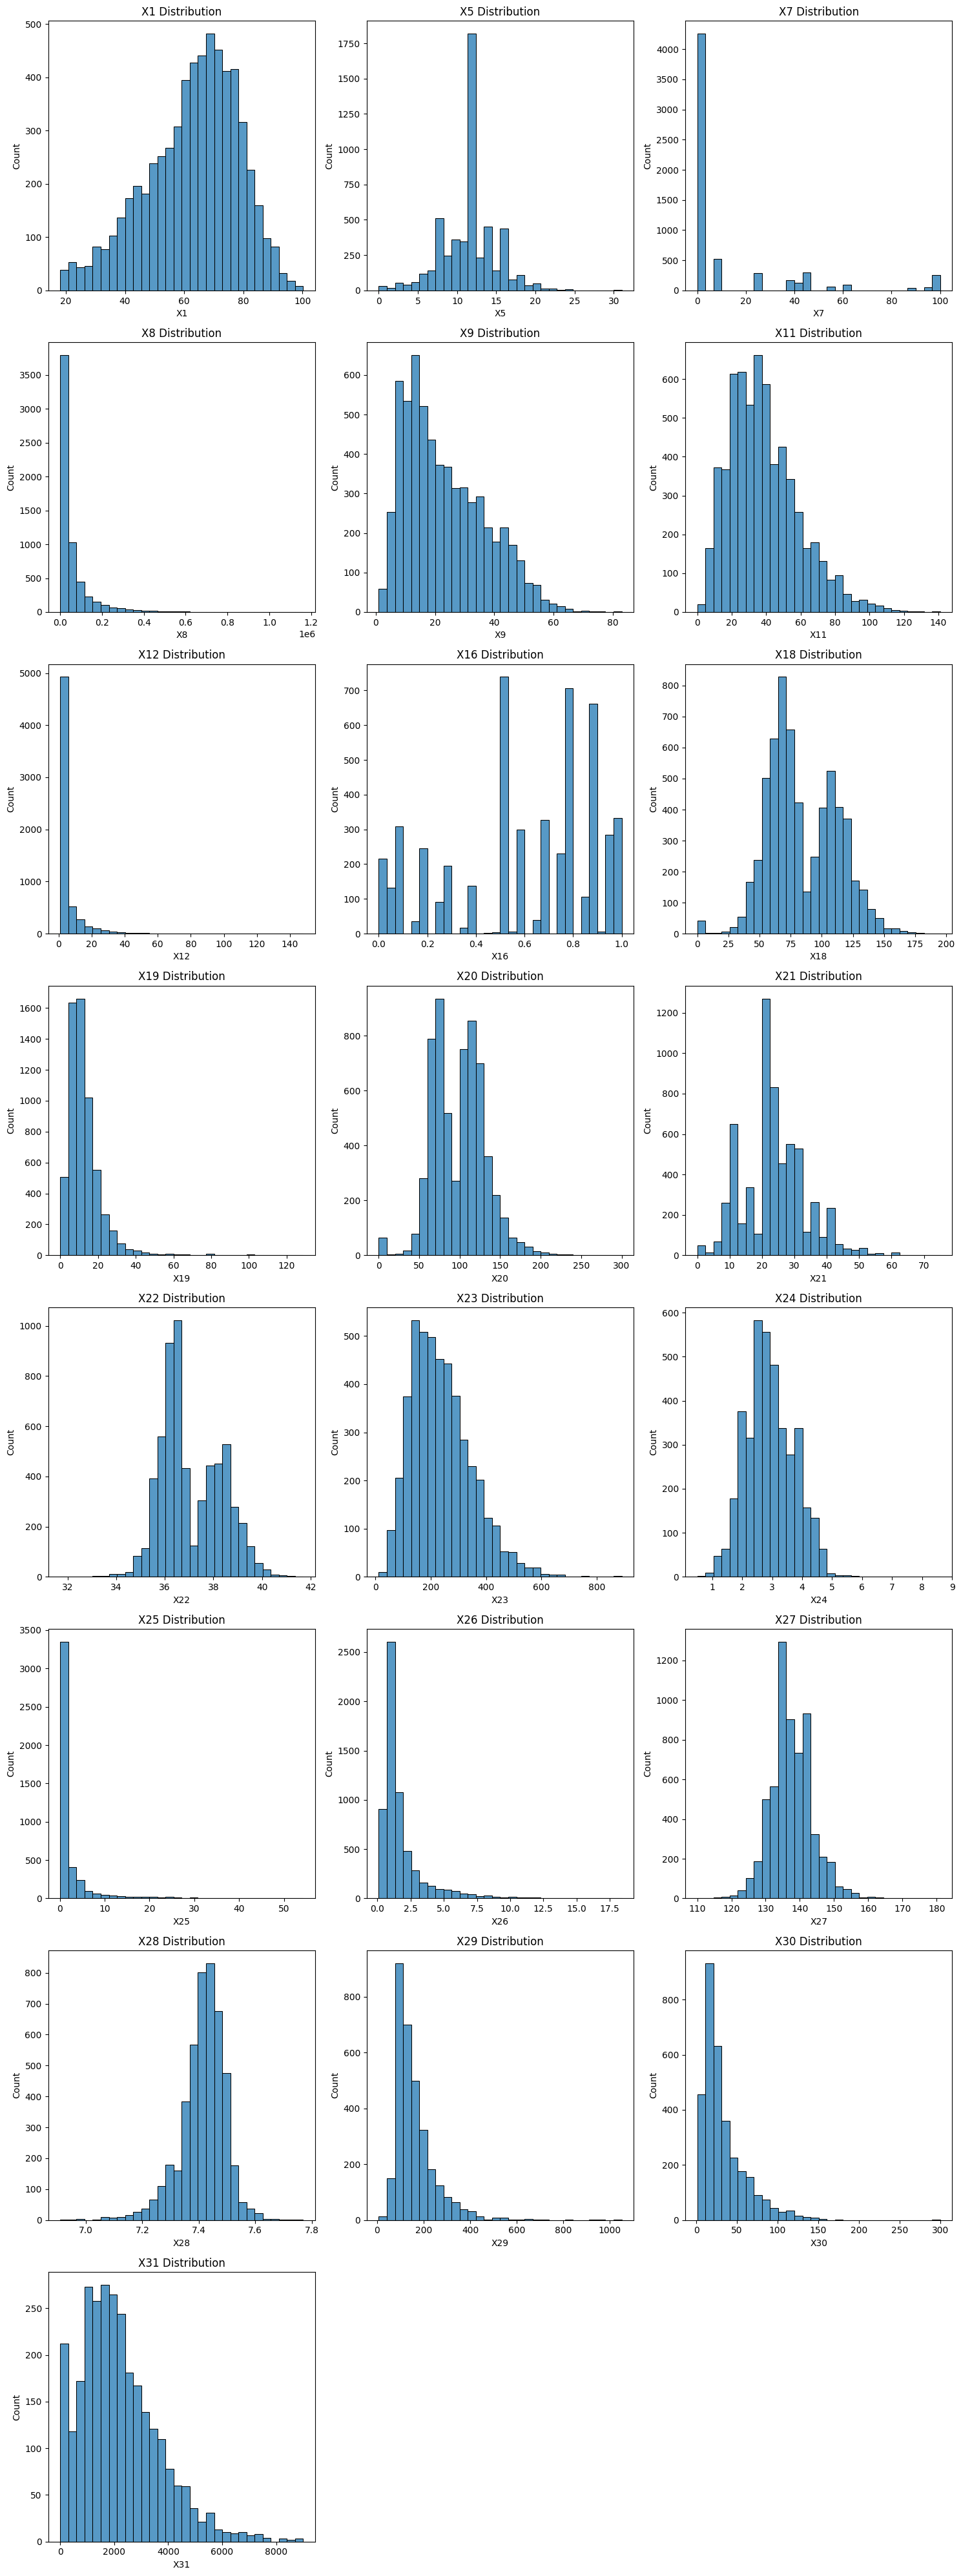


극단값이 가장 많은 상위 5개 변수:
X7: 22.42%
X12: 14.24%
X26: 11.57%
X25: 10.45%
X8: 9.72%


In [7]:

# 범주형 변수 리스트
categorical_cols = ['X2', 'X3', 'X4', 'X6', 'X10', 'X13', 'X14', 'X15', 'X17', 'X32', 'X33','X34']

# 수치형 변수만 선택 (categorical_cols와 ID, Y제외)
numeric_cols = [col for col in data.columns if col not in categorical_cols + ['ID','Y']]
numeric_data = data[numeric_cols]

# 기술 통계량 확인
print("기술 통계량:")
stats = numeric_data.describe()
print(stats.T)  # T는 transpose로 보기 좋게 변환

# IQR을 이용한 극단값 확인
def find_outliers(df):
    outliers_dict = {}

    for column in df.columns:
        # IQR 계산
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # 극단값 경계 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 극단값 개수 계산
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

        if len(outliers) > 0:
            outliers_dict[column] = {
                'count': len(outliers),
                'percentage': (len(outliers) / len(df)) * 100,
                'min': outliers.min(),
                'max': outliers.max(),
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR
            }

    return outliers_dict

# 극단값 분석
outliers = find_outliers(numeric_data)

print("\n극단값 분석 결과:")
for col, stats in outliers.items():
    print(f"\n{col}:")
    print(f"극단값 개수: {stats['count']}")
    print(f"전체 데이터 중 비율: {stats['percentage']:.2f}%")
    print(f"극단값 범위: {stats['min']} ~ {stats['max']}")
    print(f"정상 범위: {stats['lower_bound']:.2f} ~ {stats['upper_bound']:.2f}")
    print(f"Q1: {stats['Q1']:.2f}, Q3: {stats['Q3']:.2f}, IQR: {stats['IQR']:.2f}")

# boxplot 시각화 (3개의 subplot으로 나누어 표시)
n_cols = 3
n_rows = (len(numeric_data.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for idx, col in enumerate(numeric_data.columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=numeric_data[col])
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# 상관관계 분석
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 각 변수별 히스토그램
plt.figure(figsize=(15, 5*n_rows))
for idx, col in enumerate(numeric_data.columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(numeric_data[col], bins=30)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# 극단값이 많은 상위 5개 변수 출력
outlier_percentages = {col: stats['percentage'] for col, stats in outliers.items()}
top_5_outliers = dict(sorted(outlier_percentages.items(), key=lambda x: x[1], reverse=True)[:5])

print("\n극단값이 가장 많은 상위 5개 변수:")
for col, percentage in top_5_outliers.items():
    print(f"{col}: {percentage:.2f}%")

범주형 변수 분석 결과:

X2 변수 분석:
결측치 개수: 0 (0.00%)

값 분포:
male: 3458 (56.10%)
female: 2706 (43.90%)

최빈값: male (56.10%)


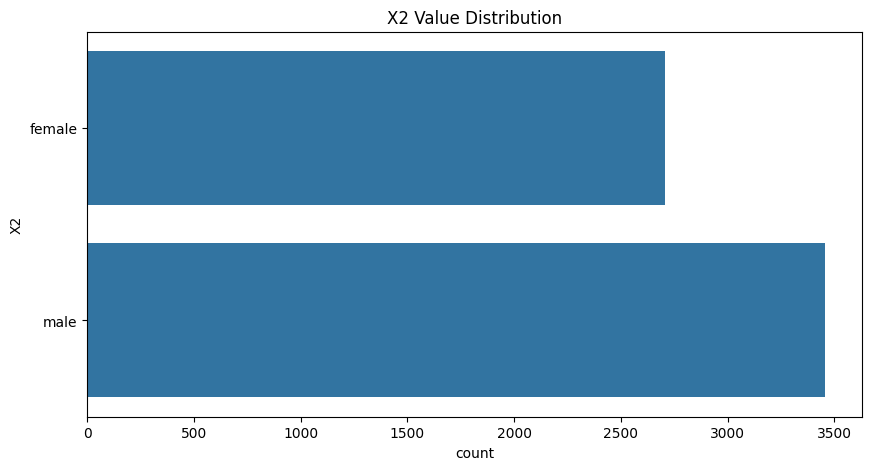


X3 변수 분석:
결측치 개수: 0 (0.00%)

값 분포:
SJ: 2943 (47.74%)
CCC: 1903 (30.87%)
AM: 866 (14.05%)
HS: 452 (7.33%)

최빈값: SJ (47.74%)


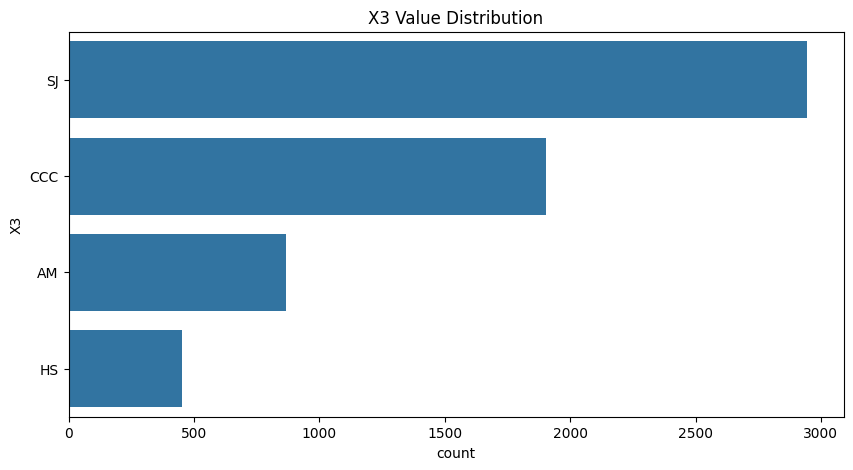


X4 변수 분석:
결측치 개수: 0 (0.00%)

값 분포:
1: 2003 (32.50%)
2: 1644 (26.67%)
3: 974 (15.80%)
0: 800 (12.98%)
4: 478 (7.75%)
5: 181 (2.94%)
6: 63 (1.02%)
7: 17 (0.28%)
8: 3 (0.05%)
9: 1 (0.02%)

최빈값: 1 (32.50%)


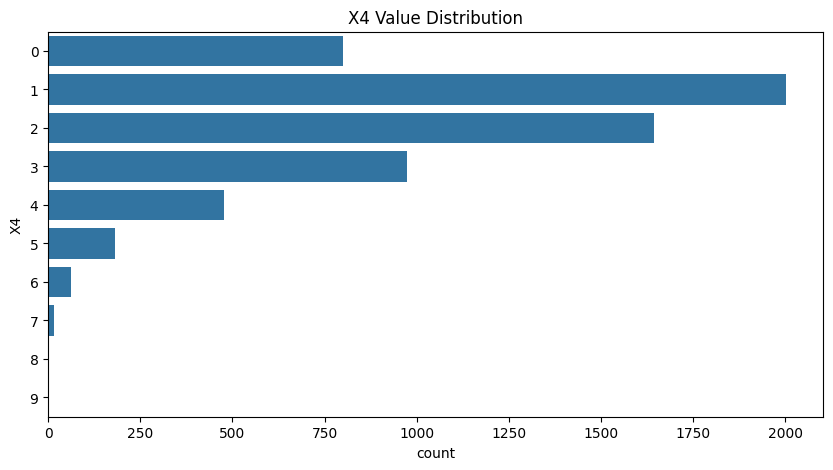


X6 변수 분석:
결측치 개수: 1762 (28.59%)

값 분포:
under $11k: 2077 (33.70%)
$11-$25k: 1117 (18.12%)
$25-$50k: 742 (12.04%)
>$50k: 466 (7.56%)

최빈값: under $11k (33.70%)


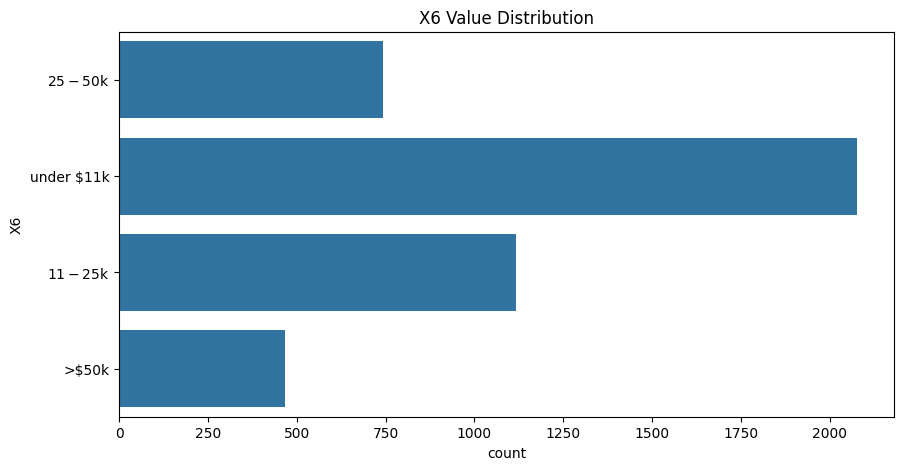


X10 변수 분석:
결측치 개수: 25 (0.41%)

값 분포:
white: 4885 (79.25%)
black: 948 (15.38%)
hispanic: 191 (3.10%)
other: 73 (1.18%)
asian: 42 (0.68%)

최빈값: white (79.25%)


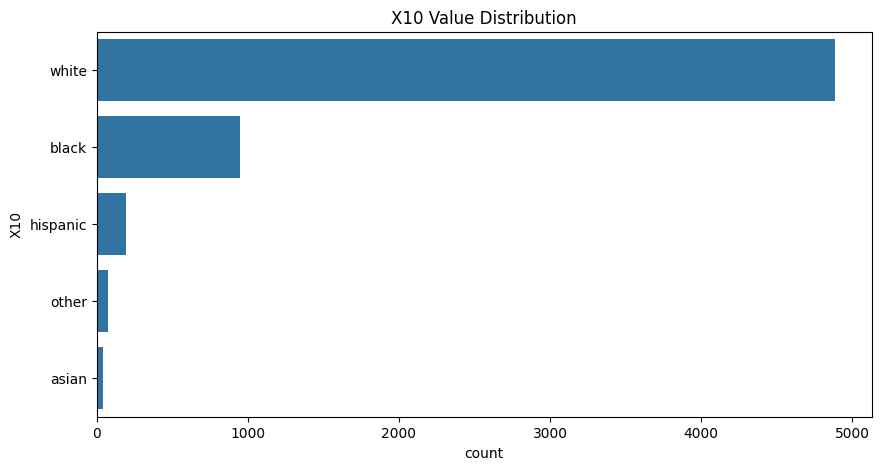


X13 변수 분석:
결측치 개수: 0 (0.00%)

값 분포:
0: 4946 (80.24%)
1: 1218 (19.76%)

최빈값: 0 (80.24%)


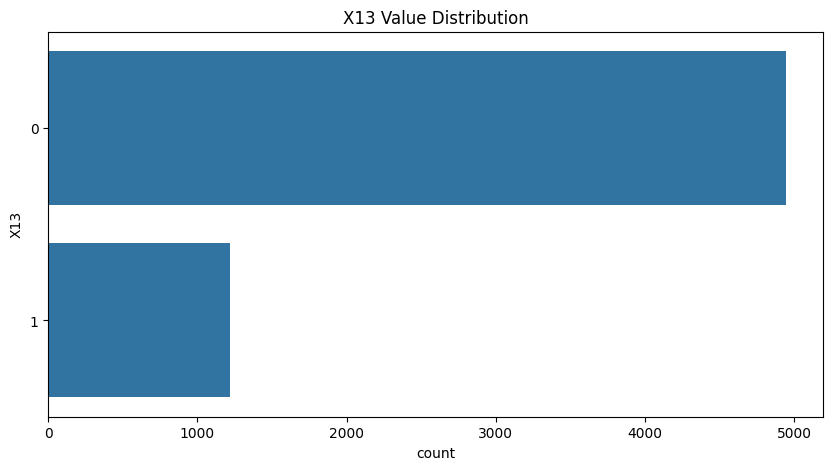


X14 변수 분석:
결측치 개수: 0 (0.00%)

값 분포:
0: 5966 (96.79%)
1: 198 (3.21%)

최빈값: 0 (96.79%)


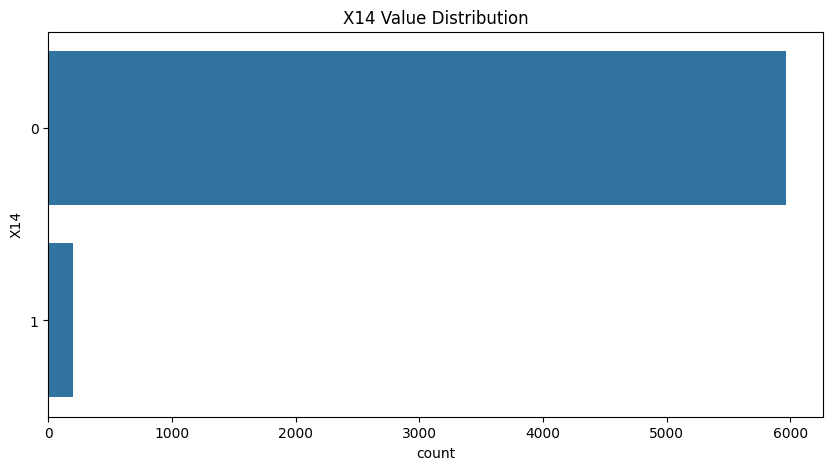


X15 변수 분석:
결측치 개수: 0 (0.00%)

값 분포:
no: 4079 (66.17%)
metastatic: 1195 (19.39%)
yes: 890 (14.44%)

최빈값: no (66.17%)


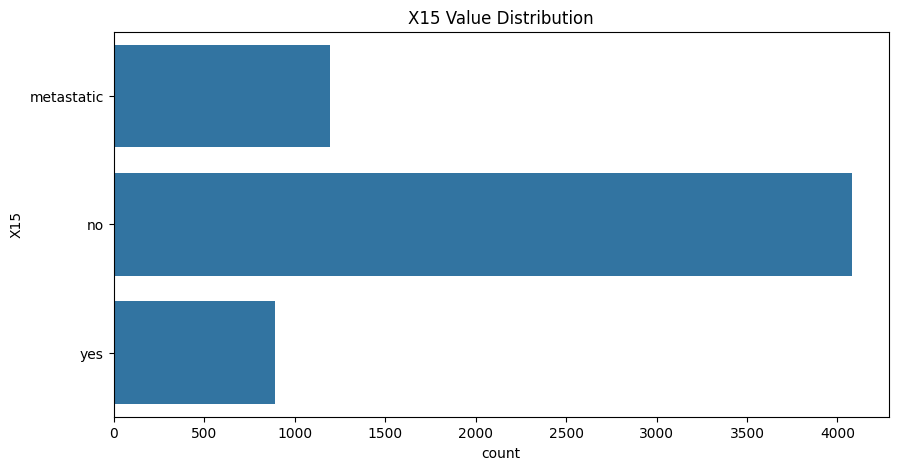


X17 변수 분석:
결측치 개수: 19 (0.31%)

값 분포:
no: 5970 (96.85%)
yes: 175 (2.84%)

최빈값: no (96.85%)


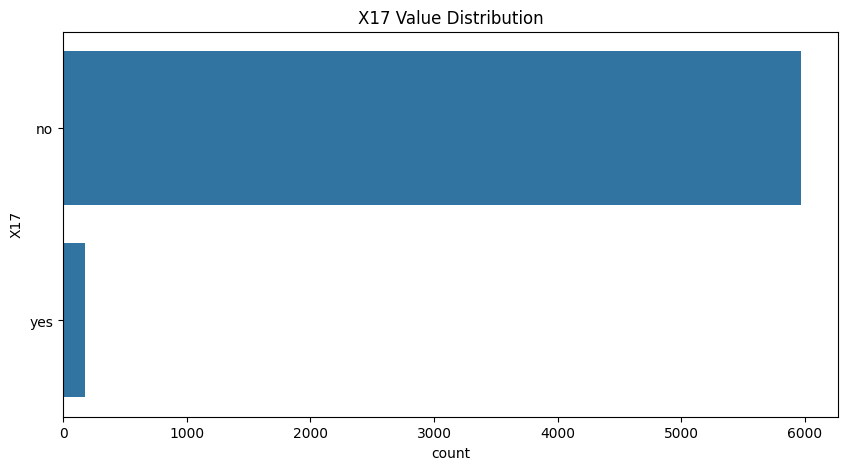


X32 변수 분석:
결측치 개수: 3750 (60.84%)

값 분포:
0.0: 1293 (20.98%)
1.0: 495 (8.03%)
2.0: 230 (3.73%)
5.0: 111 (1.80%)
3.0: 98 (1.59%)
4.0: 84 (1.36%)
6.0: 71 (1.15%)
7.0: 32 (0.52%)

최빈값: 0.0 (20.98%)


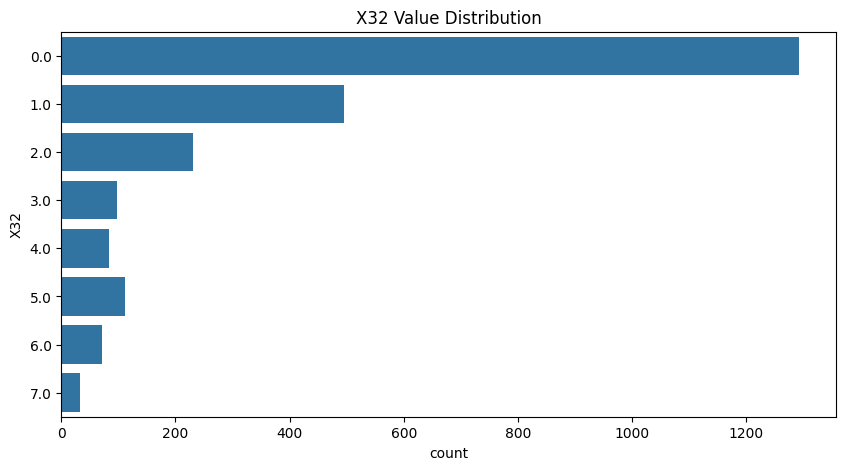


X33 변수 분석:
결측치 개수: 1602 (25.99%)

값 분포:
0.0: 2269 (36.81%)
1.0: 753 (12.22%)
2.0: 344 (5.58%)
6.0: 294 (4.77%)
3.0: 251 (4.07%)
5.0: 244 (3.96%)
7.0: 223 (3.62%)
4.0: 184 (2.99%)

최빈값: 0.0 (36.81%)


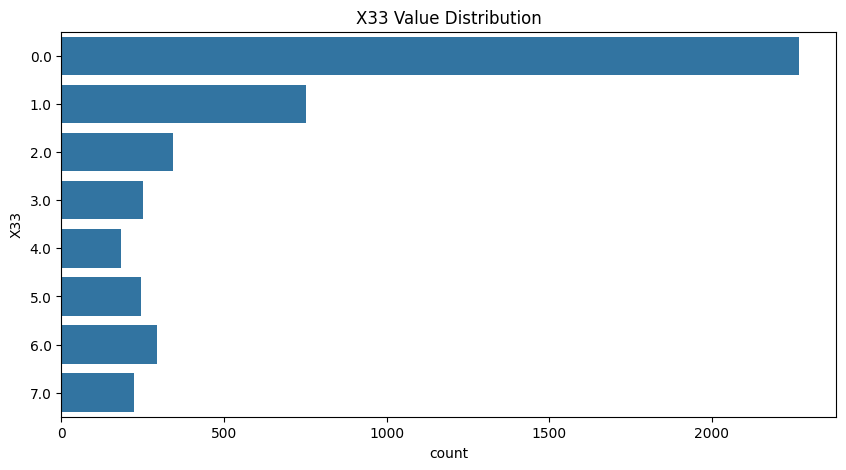


X34 변수 분석:
결측치 개수: 0 (0.00%)

값 분포:
0.0: 2269 (36.81%)
1.0: 753 (12.22%)
2.0: 344 (5.58%)
6.0: 294 (4.77%)
3.0: 251 (4.07%)
5.0: 244 (3.96%)
7.0: 223 (3.62%)
4.0: 184 (2.99%)
0.494751: 145 (2.35%)
0.4947999: 117 (1.90%)
1.1667481: 53 (0.86%)
1.1668997: 48 (0.78%)
1.8388672: 31 (0.50%)
1.8389997: 21 (0.34%)
3.855299: 11 (0.18%)
4.5273972: 10 (0.16%)
2.5107422: 9 (0.15%)
3.1831989: 9 (0.15%)
4.5273438: 9 (0.15%)
3.8549805: 7 (0.11%)
2.5110989: 7 (0.11%)
2.4311523: 4 (0.06%)
3.1831055: 4 (0.06%)
2.5249023: 3 (0.05%)
2.4750977: 3 (0.05%)
3.1762695: 3 (0.05%)
2.1689453: 3 (0.05%)
2.0869141: 3 (0.05%)
2.8095703: 3 (0.05%)
2.8491211: 3 (0.05%)
4.3330078: 3 (0.05%)
2.7797852: 2 (0.03%)
3.0449219: 2 (0.03%)
2.4321289: 2 (0.03%)
2.3598633: 2 (0.03%)
2.0917969: 2 (0.03%)
3.1201172: 2 (0.03%)
2.5112305: 2 (0.03%)
2.5805664: 2 (0.03%)
3.0395508: 2 (0.03%)
2.3256836: 2 (0.03%)
2.2265625: 2 (0.03%)
3.8486328: 2 (0.03%)
3.3823242: 2 (0.03%)
2.4677734: 2 (0.03%)
3.0224609: 2 (0.03%)
2.2416992: 2 (0.03

In [ ]:
# 범주형 변수 리스트
categorical_cols = ['X2', 'X3', 'X4', 'X6', 'X10', 'X13', 'X14', 'X15', 'X17', 'X32', 'X33', 'X34']

# 각 범주형 변수의 빈도 분석
print("범주형 변수 분석 결과:")
for col in categorical_cols:
    print(f"\n{col} 변수 분석:")

    # 결측치 개수
    null_count = data[col].isnull().sum()
    total_count = len(data[col])
    null_percentage = (null_count / total_count) * 100

    print(f"결측치 개수: {null_count} ({null_percentage:.2f}%)")

    # 값 분포
    value_counts = data[col].value_counts()
    value_percentages = (value_counts / len(data) * 100)

    print("\n값 분포:")
    for val, count in zip(value_counts.index, value_counts.values):
        percentage = (count / total_count) * 100
        print(f"{val}: {count} ({percentage:.2f}%)")

    # 최빈값
    mode_value = data[col].mode()[0]
    mode_count = value_counts[mode_value]
    mode_percentage = (mode_count / total_count) * 100

    print(f"\n최빈값: {mode_value} ({mode_percentage:.2f}%)")

    # 시각화
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, y=col)
    plt.title(f'{col} Value Distribution')
    plt.show()

# 범주형 변수들의 결측치 비율 시각화
missing_data = data[categorical_cols].isnull().sum() / len(data) * 100

plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar')
plt.title('Missing Values Percentage in Categorical Variables')
plt.xlabel('Variables')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 각 범주형 변수의 상위 N개 범주 요약
def get_top_categories(series, n=5):
    value_counts = series.value_counts()
    top_n = value_counts.head(n)
    other = pd.Series({'Others': value_counts[n:].sum()}) if len(value_counts) > n else pd.Series({})
    return pd.concat([top_n, other])

print("\n각 변수의 상위 범주 요약:")
for col in categorical_cols:
    print(f"\n{col}:")
    top_cats = get_top_categories(data[col])
    for cat, count in top_cats.items():
        print(f"{cat}: {count} ({count/len(data)*100:.2f}%)")

In [ ]:
# ID 열 제외
if 'ID' in data.columns:
  data.drop(columns=['ID'], inplace=True)

missing_counts = data.isnull().sum(axis=1)

# 7개 이상 결측치와 7개 미만 결측치의 행 수 계산
missing_above_7 = (missing_counts > 7).sum()
missing_below_7 = (missing_counts <= 7).sum()

# 결과를 데이터프레임으로 저장
df = pd.DataFrame({
    'Category': ['Rows with > 7 NA', 'Rows with <= 7 NA'],
    'Count': [missing_above_7, missing_below_7]
})

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df['Count'], color=['lightblue', 'peachpuff'], edgecolor='black')
plt.title('Number of Rows by Missing Values Count', fontsize=14)
plt.ylabel('Number of Rows', fontsize=12)
plt.xlabel('Category', fontsize=12)

# 각 막대 위에 값 표시
for i, count in enumerate(df['Count']):
    plt.text(i, count + 100, str(count), ha='center', fontsize=10)

plt.show()

In [ ]:
# Y 값별 데이터 분리 및 개별 분포 그래프
y_classes = [0, 1, 2, 3, 4]
plt.figure(figsize=(15, 10))
for i, y_class in enumerate(y_classes, 1):
    subset = data[data['Y'] == y_class]
    plt.subplot(3, 2, i)  # 3행 2열의 서브플롯
    plt.hist(subset['X16'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of 'X16' for Y={y_class}")
    plt.xlabel('X5')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Y 값별 데이터 분리 및 개별 분포 그래프
y_classes = [0, 1, 2, 3, 4]
plt.figure(figsize=(15, 10))
for i, y_class in enumerate(y_classes, 1):
    subset = data[data['Y'] == y_class]
    plt.subplot(3, 2, i)  # 3행 2열의 서브플롯
    plt.hist(subset['X8'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of 'X16' for Y={y_class}")
    plt.xlabel('X16')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Y 값별 데이터 분리 및 개별 분포 그래프
y_classes = [0, 1, 2, 3, 4]
plt.figure(figsize=(15, 10))
for i, y_class in enumerate(y_classes, 1):
    subset = data[data['Y'] == y_class]
    plt.subplot(3, 2, i)  # 3행 2열의 서브플롯
    plt.hist(subset['X9'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of 'X16' for Y={y_class}")
    plt.xlabel('X16')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Y 값별 데이터 분리 및 개별 분포 그래프
y_classes = [0, 1, 2, 3, 4]
plt.figure(figsize=(15, 10))
for i, y_class in enumerate(y_classes, 1):
    subset = data[data['Y'] == y_class]
    plt.subplot(3, 2, i)  # 3행 2열의 서브플롯
    plt.hist(subset['X32'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of 'X16' for Y={y_class}")
    plt.xlabel('X16')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame(data)
df

# 결측치 위치 유사도 판단
missing_position = df.isnull().astype(int)
similarity_matrix = cosine_similarity(missing_position.T)

# 코사인 유사도 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=df.columns, yticklabels=df.columns)
plt.title("Missing Values Position Similarity (Cosine)")
plt.show()

# 결측치 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# dict_wed 정의
dict_wed = {
    'Demographic': ['X1', 'X2', 'X5', 'X6', 'X10'],
    'Status': ['X3', 'X4'],
    'Measurement': ['X7', 'X8', 'X9'],
}

# 카테고리별 시각화
for category, columns in dict_wed.items():
    n_cols = len(columns)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 4))
    fig.suptitle(f"{category} Variables", fontsize=16, y=1.02)

    # 단일 플롯일 경우 리스트로 변환
    if n_cols == 1:
        axes = [axes]

    for col, ax in zip(columns, axes):
        if col in df.columns:
            if df[col].nunique() > 10:  # 연속형 변수: 히스토그램
                ax.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
                ax.set_title(f"Histogram of {col}")
            else:  # 범주형 변수: 바 차트
                df[col].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
                ax.set_title(f"Bar Plot of {col}")
            ax.set_xlabel(col)
        else:
            ax.axis('off')  # 열이 데이터에 없을 경우
            ax.set_title(f"{col} (not in data)")

    plt.tight_layout()
    plt.show()